<a href="https://colab.research.google.com/github/ramesh6762/Point_Cloud_Object_Classification/blob/main/rcpcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install open3d numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.1
    Unin

In [ ]:
!pip install numpy scipy open3d

In [ ]:
!pip install trimesh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 711.2/711.2 kB 14.9 MB/s eta 0:00:00


In [ ]:
import os
import glob
import trimesh
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(1234)

In [ ]:
DATA_DIR = tf.keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

473402300/473402300 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
import os
import zipfile

# Get the dataset path
DATA_DIR = tf.keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)

# Get the extracted folder path
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

# Verify the dataset directory exists
if not os.path.exists(DATA_DIR):
    print(f"❌ Error: Dataset directory not found at {DATA_DIR}")
    # Manually extract the downloaded zip file
    with zipfile.ZipFile(os.path.join(os.path.dirname(DATA_DIR), "modelnet.zip"), 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(DATA_DIR))
    print(f"✅ Dataset extracted to: {DATA_DIR}")  # Confirm extraction
else:
    print(f"✅ Dataset directory found: {DATA_DIR}")

# List available categories to verify dataset structure
categories = os.listdir(DATA_DIR)
print(f"📂 Available categories: {categories}")

# Find a valid file path dynamically
for category in categories:
    category_path = os.path.join(DATA_DIR, category, "train")
    if os.path.exists(category_path):
        files = os.listdir(category_path)
        if files:
            file_path = os.path.join(category_path, files[0])  # First available file
            print(f"✅ Found a sample file: {file_path}")
            break
    else:
        print(f"⚠️ No train directory found in {category}")

# Final check
if 'file_path' in locals() and os.path.exists(file_path):
    print(f"✅ File ready to load: {file_path}")
else:
    print("❌ No valid file found. Please check the dataset.")

❌ Error: Dataset directory not found at /root/.keras/datasets/ModelNet10
✅ Dataset extracted to: /root/.keras/datasets/ModelNet10
📂 Available categories: ['bathtub', 'chair', '.DS_Store', 'toilet', 'monitor', 'desk', 'README.txt', 'sofa', 'night_stand', 'table', 'dresser', 'bed']
✅ Found a sample file: /root/.keras/datasets/ModelNet10/bathtub/train/bathtub_0057.off
✅ File ready to load: /root/.keras/datasets/ModelNet10/bathtub/train/bathtub_0057.off


In [ ]:
# List all categories
categories = os.listdir(DATA_DIR)
print("\n📂 Available categories:")
for category in categories:
    print(f" - {category}")

# Display all files inside each category
print("\n📂 Dataset Structure:")
for category in categories:
    category_path = os.path.join(DATA_DIR, category)
    if os.path.isdir(category_path):
        print(f"\n📁 Category: {category}")

        # Train and Test directories
        for split in ["train", "test"]:
            split_path = os.path.join(category_path, split)
            if os.path.exists(split_path):
                files = os.listdir(split_path)
                print(f"  📂 {split}: {len(files)} files")
                for file in files[:10]:  # Display first 10 files only
                    print(f"   - {file}")
            else:
                print(f"  ⚠️ No '{split}' directory found in {category}")

print("\n✅ Dataset successfully listed!")


📂 Available categories:
 - bathtub
 - chair
 - .DS_Store
 - toilet
 - monitor
 - desk
 - README.txt
 - sofa
 - night_stand
 - table
 - dresser
 - bed

📂 Dataset Structure:

📁 Category: bathtub
  📂 train: 106 files
   - bathtub_0057.off
   - bathtub_0034.off
   - bathtub_0101.off
   - bathtub_0082.off
   - bathtub_0048.off
   - bathtub_0007.off
   - bathtub_0086.off
   - bathtub_0059.off
   - bathtub_0036.off
   - bathtub_0071.off
  📂 test: 50 files
   - bathtub_0120.off
   - bathtub_0114.off
   - bathtub_0154.off
   - bathtub_0144.off
   - bathtub_0145.off
   - bathtub_0151.off
   - bathtub_0138.off
   - bathtub_0146.off
   - bathtub_0108.off
   - bathtub_0143.off

📁 Category: chair
  📂 train: 890 files
   - chair_0283.off
   - chair_0864.off
   - chair_0526.off
   - chair_0660.off
   - chair_0694.off
   - chair_0397.off
   - chair_0710.off
   - chair_0545.off
   - chair_0042.off
   - chair_0751.off
  📂 test: 101 files
   - chair_0921.off
   - chair_0903.off
   - chair_0973.off
   - c

In [ ]:
import os

DATA_DIR = "/root/.keras/datasets/ModelNet10"

# Check if "chair" category exists
chair_path = os.path.join(DATA_DIR, "chair", "train")
if os.path.exists(chair_path):
    print(f"✅ 'chair' category found: {chair_path}")
    files = os.listdir(chair_path)
    print(f"📂 Available chair files: {files}")
else:
    print("❌ 'chair' category not found. Check dataset extraction.")


✅ 'chair' category found: /root/.keras/datasets/ModelNet10/chair/train
📂 Available chair files: ['chair_0283.off', 'chair_0864.off', 'chair_0526.off', 'chair_0660.off', 'chair_0694.off', 'chair_0397.off', 'chair_0710.off', 'chair_0545.off', 'chair_0042.off', 'chair_0751.off', 'chair_0048.off', 'chair_0669.off', 'chair_0875.off', 'chair_0177.off', 'chair_0145.off', 'chair_0331.off', 'chair_0302.off', 'chair_0811.off', 'chair_0691.off', 'chair_0860.off', 'chair_0571.off', 'chair_0024.off', 'chair_0635.off', 'chair_0354.off', 'chair_0219.off', 'chair_0441.off', 'chair_0592.off', 'chair_0114.off', 'chair_0548.off', 'chair_0673.off', 'chair_0115.off', 'chair_0889.off', 'chair_0279.off', 'chair_0835.off', 'chair_0086.off', 'chair_0741.off', 'chair_0085.off', 'chair_0702.off', 'chair_0278.off', 'chair_0059.off', 'chair_0143.off', 'chair_0293.off', 'chair_0404.off', 'chair_0559.off', 'chair_0809.off', 'chair_0267.off', 'chair_0004.off', 'chair_0325.off', 'chair_0488.off', 'chair_0580.off', 'ch

In [ ]:
mesh = trimesh.load(os.path.join(DATA_DIR, "/root/.keras/datasets/ModelNet10/chair/train/chair_0001.off"))

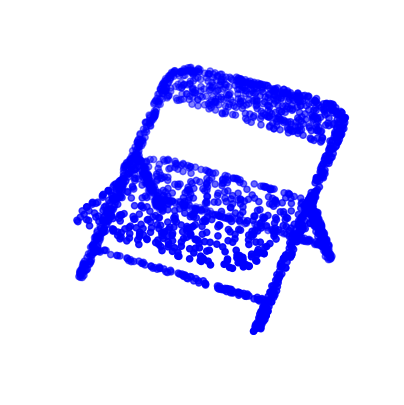

In [ ]:
# sample point from
points = mesh.sample(2048)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2],color = 'blue')
ax.set_axis_off()
plt.show()

Loading: /root/.keras/datasets/ModelNet10/bathtub/train/bathtub_0057.off


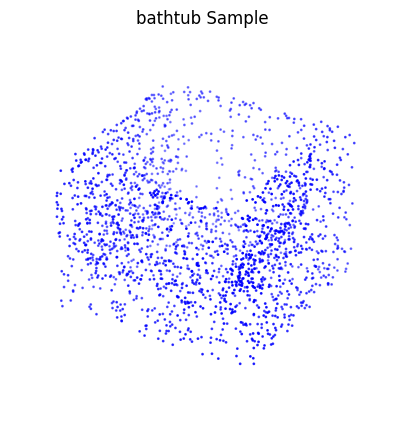

Loading: /root/.keras/datasets/ModelNet10/chair/train/chair_0283.off


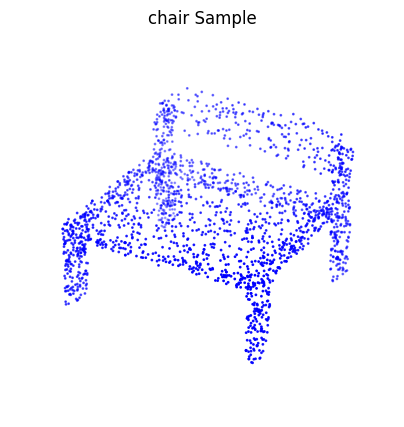

Loading: /root/.keras/datasets/ModelNet10/toilet/train/toilet_0166.off


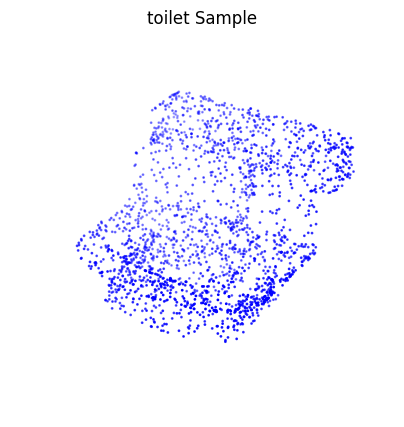

Loading: /root/.keras/datasets/ModelNet10/monitor/train/monitor_0209.off


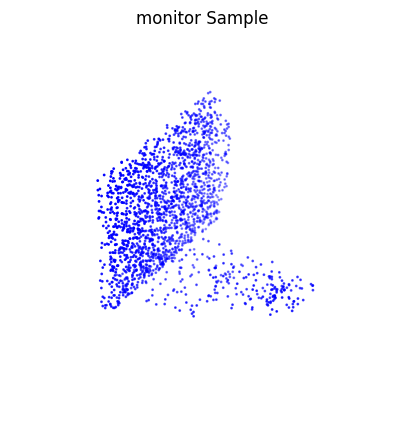

Loading: /root/.keras/datasets/ModelNet10/desk/train/desk_0134.off


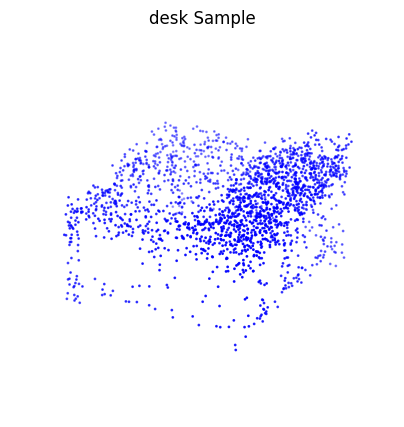

Loading: /root/.keras/datasets/ModelNet10/sofa/train/sofa_0391.off


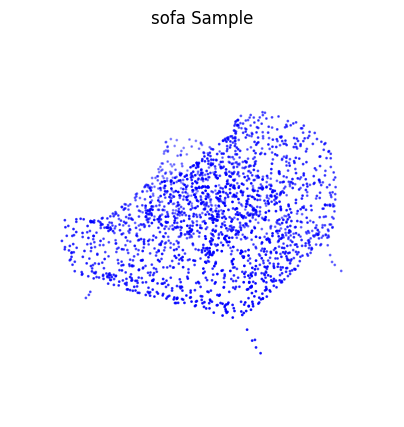

Loading: /root/.keras/datasets/ModelNet10/night_stand/train/night_stand_0122.off


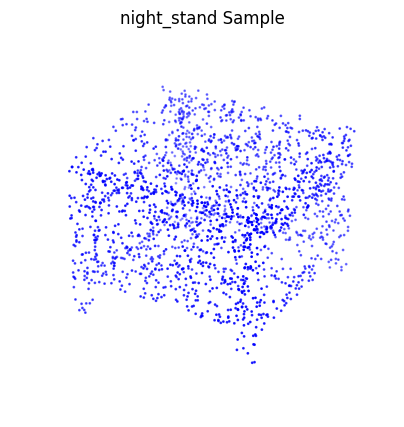

Loading: /root/.keras/datasets/ModelNet10/table/train/table_0110.off


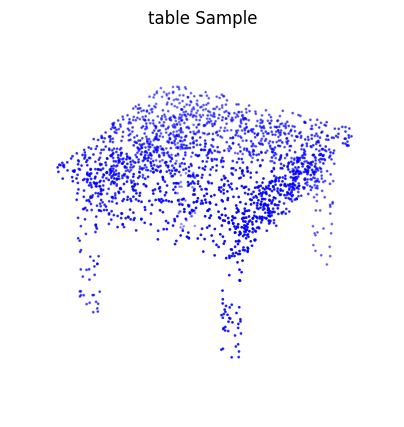

Loading: /root/.keras/datasets/ModelNet10/dresser/train/dresser_0189.off


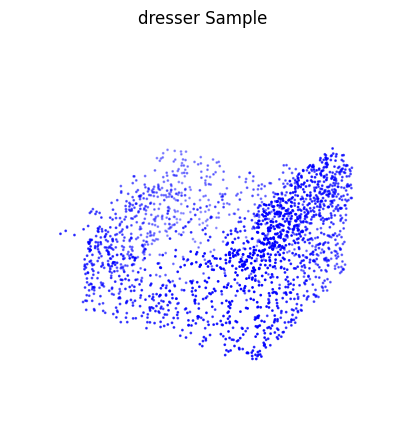

Loading: /root/.keras/datasets/ModelNet10/bed/train/bed_0244.off


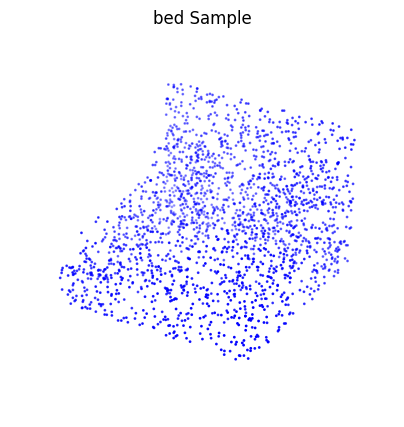

In [ ]:
import os
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define dataset directory
DATA_DIR = os.path.expanduser("~/.keras/datasets/ModelNet10")

# Get categories
categories = [cat for cat in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, cat))]

# Function to load and visualize an OFF file
def visualize_off_file(category):
    category_path = os.path.join(DATA_DIR, category, "train")
    files = [f for f in os.listdir(category_path) if f.endswith(".off")]

    if not files:
        print(f"No .off files found in {category} category!")
        return

    file_path = os.path.join(category_path, files[0])  # Load first file
    print(f"Loading: {file_path}")

    # Load mesh
    mesh = trimesh.load(file_path)

    # Convert to point cloud
    points = mesh.sample(2048)

    # Plot
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', s=1)
    ax.set_title(f"{category} Sample")
    ax.set_axis_off()
    plt.show()

# Visualize a sample from each category
for category in categories:
    visualize_off_file(category)


In [ ]:
import os
import trimesh
import numpy as np
import plotly.graph_objects as go

# Define dataset directory
DATA_DIR = os.path.expanduser("~/.keras/datasets/ModelNet10")

# Function to rotate the point cloud visualization
def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8
    frames = []

    def rotate_z(x, y, z, theta):
        w = x + 1j * y
        return np.real(np.exp(1j * theta) * w), np.imag(np.exp(1j * theta) * w), z

    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))

    fig = go.Figure(
        data=data,
        layout=go.Layout(
            updatemenus=[
                dict(
                    type='buttons',
                    showactive=False,
                    y=1,
                    x=0.8,
                    xanchor='left',
                    yanchor='bottom',
                    pad=dict(t=45, r=10),
                    buttons=[
                        dict(
                            label='Play',
                            method='animate',
                            args=[
                                None,
                                dict(frame=dict(duration=50, redraw=True),
                                     transition=dict(duration=0),
                                     fromcurrent=True,
                                     mode='immediate')
                            ]
                        )
                    ]
                )
            ]
        ),
        frames=frames
    )
    return fig

# Function to load and visualize an OFF file
def load_and_visualize(category):
    category_path = os.path.join(DATA_DIR, category, "train")
    files = [f for f in os.listdir(category_path) if f.endswith(".off")]

    if not files:
        print(f"⚠️ No .off files found in {category} category!")
        return

    file_path = os.path.join(category_path, files[1])  # Load first file
    print(f"✅ Loading: {file_path}")

    # Load mesh
    mesh = trimesh.load(file_path)

    # Sample points from the mesh
    points = mesh.sample(2048)

    # Convert points into a Plotly scatter plot
    scatter = go.Scatter3d(
        x=points[:, 0], y=points[:, 1], z=points[:, 2],
        mode='markers', marker=dict(size=2, color=points[:, 2], colorscale='Viridis')
    )

    # Show rotating visualization
    fig = visualize_rotate([scatter])
    fig.show()

# Example: Visualize a sample from "sofa" category
load_and_visualize("sofa")


✅ Loading: /root/.keras/datasets/ModelNet10/sofa/train/sofa_0313.off


In [ ]:
import os
import trimesh
import numpy as np
import plotly.graph_objects as go

# Define dataset directory
DATA_DIR = os.path.expanduser("~/.keras/datasets/ModelNet10")

# Function to rotate the point cloud visualization (unchanged)
def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8
    frames = []

    def rotate_z(x, y, z, theta):
        w = x + 1j * y
        return np.real(np.exp(1j * theta) * w), np.imag(np.exp(1j * theta) * w), z

    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))

    fig = go.Figure(
        data=data,
        layout=go.Layout(
            updatemenus=[
                dict(
                    type='buttons',
                    showactive=False,
                    y=1,
                    x=0.8,
                    xanchor='left',
                    yanchor='bottom',
                    pad=dict(t=45, r=10),
                    buttons=[
                        dict(
                            label='Play',
                            method='animate',
                            args=[
                                None,
                                dict(frame=dict(duration=50, redraw=True),
                                     transition=dict(duration=0),
                                     fromcurrent=True,
                                     mode='immediate')
                            ]
                        )
                    ]
                )
            ]
        ),
        frames=frames
    )
    return fig

# Function to load and visualize an OFF file
def load_and_visualize(category):
    category_path = os.path.join(DATA_DIR, category, "train")
    files = [f for f in os.listdir(category_path) if f.endswith(".off")]

    if not files:
        print(f"⚠️ No .off files found in {category} category!")
        return

    file_path = os.path.join(category_path, files[1])  # Load first file
    print(f"✅ Loading: {file_path}")

    # Load mesh
    mesh = trimesh.load(file_path)

    # Get mesh vertices and faces for Mesh3d
    x, y, z = mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2]
    i, j, k = mesh.faces[:, 0], mesh.faces[:, 1], mesh.faces[:, 2]

    # Create Mesh3d object
    mesh3d = go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50, i=i, j=j, k=k)

    # Show rotating visualization
    fig = visualize_rotate([mesh3d]) # Visualize the mesh
    fig.show()

# Example: Visualize a sample from "sofa" category
load_and_visualize("sofa")

✅ Loading: /root/.keras/datasets/ModelNet10/sofa/train/sofa_0313.off


In [ ]:
import os
import trimesh
import numpy as np
import plotly.graph_objects as go

# Define dataset directory
DATA_DIR = os.path.expanduser("~/.keras/datasets/ModelNet10")

# Function to rotate the point cloud visualization
def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8
    frames = []

    def rotate_z(x, y, z, theta):
        w = x + 1j * y
        return np.real(np.exp(1j * theta) * w), np.imag(np.exp(1j * theta) * w), z

    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))

    fig = go.Figure(
        data=data,
        layout=go.Layout(
            updatemenus=[
                dict(
                    type='buttons',
                    showactive=False,
                    y=1,
                    x=0.8,
                    xanchor='left',
                    yanchor='bottom',
                    pad=dict(t=45, r=10),
                    buttons=[
                        dict(
                            label='Play',
                            method='animate',
                            args=[
                                None,
                                dict(frame=dict(duration=50, redraw=True),
                                     transition=dict(duration=0),
                                     fromcurrent=True,
                                     mode='immediate')
                            ]
                        )
                    ]
                )
            ]
        ),
        frames=frames
    )
    return fig

# Function to load and visualize an OFF file from the "bed" category
def load_and_visualize_bed():
    category = "bed"
    category_path = os.path.join(DATA_DIR, category, "train")
    files = [f for f in os.listdir(category_path) if f.endswith(".off")]

    if not files:
        print(f"⚠️ No .off files found in {category} category!")
        return

    file_path = os.path.join(category_path, files[0])  # Load the first file
    print(f"✅ Loading: {file_path}")

    # Load mesh
    mesh = trimesh.load(file_path)

    # Sample points from the mesh
    points = mesh.sample(2048)

    # Convert points into a Plotly scatter plot
    scatter = go.Scatter3d(
        x=points[:, 0], y=points[:, 1], z=points[:, 2],
        mode='markers', marker=dict(size=2, color=points[:, 2], colorscale='Viridis')
    )

    # Show rotating visualization
    fig = visualize_rotate([scatter])
    fig.show()

# Run the function to visualize a "bed" sample
load_and_visualize_bed()


✅ Loading: /root/.keras/datasets/ModelNet10/bed/train/bed_0244.off


In [ ]:
import os
import trimesh
import numpy as np
import plotly.graph_objects as go

# Define dataset directory (Make sure to update the path based on your environment)
DATA_DIR = os.path.expanduser("~/.keras/datasets/ModelNet10")

# Function to rotate the point cloud visualization
def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8  # Camera position
    frames = []

    # Function to rotate along the z-axis
    def rotate_z(x, y, z, theta):
        w = x + 1j * y
        return np.real(np.exp(1j * theta) * w), np.imag(np.exp(1j * theta) * w), z

    # Create frames for animation
    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))

    # Create the Plotly figure with rotating animation
    fig = go.Figure(
        data=data,
        layout=go.Layout(
            updatemenus=[  # Controls for animation
                dict(
                    type='buttons',
                    showactive=False,
                    y=1,
                    x=0.8,
                    xanchor='left',
                    yanchor='bottom',
                    pad=dict(t=45, r=10),
                    buttons=[  # Play button for animation
                        dict(
                            label='Play',
                            method='animate',
                            args=[
                                None,
                                dict(frame=dict(duration=50, redraw=True),
                                     transition=dict(duration=0),
                                     fromcurrent=True,
                                     mode='immediate')
                            ]
                        )
                    ]
                )
            ]
        ),
        frames=frames  # Add rotating frames
    )
    return fig

# Function to load and visualize an OFF file from ModelNet10
def load_and_visualize(category):
    category_path = os.path.join(DATA_DIR, category, "train")  # Directory for train data
    files = [f for f in os.listdir(category_path) if f.endswith(".off")]  # List .off files

    if not files:  # Handle case with no files found
        print(f"⚠️ No .off files found in {category} category!")
        return

    file_path = os.path.join(category_path, files[0])  # Load the first .off file
    print(f"✅ Loading: {file_path}")

    # Load mesh using Trimesh
    mesh = trimesh.load(file_path)

    # Extract vertices and faces from the mesh
    x, y, z = mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2]
    i, j, k = mesh.faces[:, 0], mesh.faces[:, 1], mesh.faces[:, 2]

    # Create Mesh3d object for Plotly
    mesh3d = go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50, i=i, j=j, k=k)

    # Show rotating visualization
    fig = visualize_rotate([mesh3d])  # Visualize the mesh with rotation animation
    fig.show()

# Example: Visualize a sample from "bed" category
load_and_visualize("bed")


✅ Loading: /root/.keras/datasets/ModelNet10/bed/train/bed_0244.off


In [ ]:
import os
import trimesh
import numpy as np
import plotly.graph_objects as go

# Define dataset directory
DATA_DIR = os.path.expanduser("~/.keras/datasets/ModelNet10")

# Function to rotate the point cloud visualization
def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8
    frames = []

    def rotate_z(x, y, z, theta):
        w = x + 1j * y
        return np.real(np.exp(1j * theta) * w), np.imag(np.exp(1j * theta) * w), z

    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))

    fig = go.Figure(
        data=data,
        layout=go.Layout(
            updatemenus=[
                dict(
                    type='buttons',
                    showactive=False,
                    y=1,
                    x=0.8,
                    xanchor='left',
                    yanchor='bottom',
                    pad=dict(t=45, r=10),
                    buttons=[
                        dict(
                            label='Play',
                            method='animate',
                            args=[
                                None,
                                dict(frame=dict(duration=50, redraw=True),
                                     transition=dict(duration=0),
                                     fromcurrent=True,
                                     mode='immediate')
                            ]
                        )
                    ]
                )
            ]
        ),
        frames=frames
    )
    return fig

# Function to load and visualize an OFF file from the "bed" category
def load_and_visualize_bed():
    category = "table"
    category_path = os.path.join(DATA_DIR, category, "train")
    files = [f for f in os.listdir(category_path) if f.endswith(".off")]

    if not files:
        print(f"⚠️ No .off files found in {category} category!")
        return

    file_path = os.path.join(category_path, files[0])  # Load the first file
    print(f"✅ Loading: {file_path}")

    # Load mesh
    mesh = trimesh.load(file_path)

    # Sample points from the mesh
    points = mesh.sample(2048)

    # Convert points into a Plotly scatter plot
    scatter = go.Scatter3d(
        x=points[:, 0], y=points[:, 1], z=points[:, 2],
        mode='markers', marker=dict(size=2, color=points[:, 2], colorscale='Viridis')
    )

    # Show rotating visualization
    fig = visualize_rotate([scatter])
    fig.show()

# Run the function to visualize a "bed" sample
load_and_visualize_bed()


✅ Loading: /root/.keras/datasets/ModelNet10/table/train/table_0110.off


In [ ]:
import os
import trimesh
import numpy as np
import plotly.graph_objects as go

# Define dataset directory (Make sure to update the path based on your environment)
DATA_DIR = os.path.expanduser("~/.keras/datasets/ModelNet10")

# Function to rotate the point cloud visualization
def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8  # Camera position
    frames = []

    # Function to rotate along the z-axis
    def rotate_z(x, y, z, theta):
        w = x + 1j * y
        return np.real(np.exp(1j * theta) * w), np.imag(np.exp(1j * theta) * w), z

    # Create frames for animation
    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))

    # Create the Plotly figure with rotating animation
    fig = go.Figure(
        data=data,
        layout=go.Layout(
            updatemenus=[  # Controls for animation
                dict(
                    type='buttons',
                    showactive=False,
                    y=1,
                    x=0.8,
                    xanchor='left',
                    yanchor='bottom',
                    pad=dict(t=45, r=10),
                    buttons=[  # Play button for animation
                        dict(
                            label='Play',
                            method='animate',
                            args=[
                                None,
                                dict(frame=dict(duration=50, redraw=True),
                                     transition=dict(duration=0),
                                     fromcurrent=True,
                                     mode='immediate')
                            ]
                        )
                    ]
                )
            ]
        ),
        frames=frames  # Add rotating frames
    )
    return fig

# Function to load and visualize an OFF file from ModelNet10
def load_and_visualize(category):
    category_path = os.path.join(DATA_DIR, category, "train")  # Directory for train data
    files = [f for f in os.listdir(category_path) if f.endswith(".off")]  # List .off files

    if not files:  # Handle case with no files found
        print(f"⚠️ No .off files found in {category} category!")
        return

    file_path = os.path.join(category_path, files[0])  # Load the first .off file
    print(f"✅ Loading: {file_path}")

    # Load mesh using Trimesh
    mesh = trimesh.load(file_path)

    # Extract vertices and faces from the mesh
    x, y, z = mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2]
    i, j, k = mesh.faces[:, 0], mesh.faces[:, 1], mesh.faces[:, 2]

    # Create Mesh3d object for Plotly
    mesh3d = go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50, i=i, j=j, k=k)

    # Show rotating visualization
    fig = visualize_rotate([mesh3d])  # Visualize the mesh with rotation animation
    fig.show()

# Example: Visualize a sample from "bed" category
load_and_visualize("table")


✅ Loading: /root/.keras/datasets/ModelNet10/table/train/table_0110.off


In [ ]:
def parse_dataset(num_points=2048):

    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))

    for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]
        # gather all files
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

In [ ]:
NUM_POINTS = 2048
NUM_CLASSES = 10
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(
    NUM_POINTS
)

processing class: bathtub
processing class: chair
processing class: toilet
processing class: monitor
processing class: desk
processing class: sofa
processing class: night_stand
processing class: table
processing class: dresser
processing class: bed


In [ ]:
train_points.shape

(3991, 2048, 3)

In [ ]:
b=train_points

In [ ]:
b.shape

(3991, 2048, 3)

In [ ]:
train_labels.shape

(3991,)

In [ ]:
BATCH_SIZE = 32
def augment(points, label):
    # jitter points
    #points == objet (Nx3) associer a une classe 50xNx3
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_labels))


train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

In [ ]:
def conv_bn(x, filters):
    # x: c'est l'input de taille Nx3
    # filter de taille 1xfilters  --> output Nxfilters
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    #Batch Normalization applique une transformation qui maintient la sortie moyenne proche de 0 et l'écart type de sortie proche de 1
    #batch normalization affects the output of the previous activation layer by subtracting the batch mean, and then dividing by the batch’s standard deviation.
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x) #x > 0


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [ ]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

    def get_config(self):
        return {
            "num_features": self.num_features,
            "l2reg": self.l2reg,
        }

In [ ]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten()) #Id3
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    #matrice 3 x 3
    feat_T = layers.Reshape((num_features, num_features))(x)
    #matrice d'input nx3 multiplier par une matrice 3x3 --> output matrice de taille nx3
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [ ]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 2048, 3)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 2048, 32)  │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 2048, 32)  │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 2048, 32)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 2048, 64)  │      2,112 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048, 64)  │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 2048, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 2048, 512) │     33,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048, 512) │      2,048 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 2048, 512) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_2[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │      1,161 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 3, 3)      │          0 │ dense_2[0][0]   

 Total params: 748,979 (2.86 MB)

 Trainable params: 742,899 (2.83 MB)

 Non-trainable params: 6,080 (23.75 KB)

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - loss: 43.8473 - sparse_categorical_accuracy: 0.2032 - val_loss: 7555784313405440.0000 - val_sparse_categorical_accuracy: 0.2015
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 36.1256 - sparse_categorical_accuracy: 0.3227 - val_loss: 171366137093685248.0000 - val_sparse_categorical_accuracy: 0.2610
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 36.2452 - sparse_categorical_accuracy: 0.3356 - val_loss: 35.8895 - val_sparse_categorical_accuracy: 0.1410
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 35.8190 - sparse_categorical_accuracy: 0.3922 - val_loss: 4943608237887848448.0000 - val_sparse_categorical_accuracy: 0.3139
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 35.8285 - sparse_categorical_accuracy: 0.3789 - val_loss: 15034004738670592.0000 - val_sparse_categorical_accuracy: 0.2764
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 35.7813 - sparse_categorica

In [ ]:
# Save the trained model in .keras format
model.save('/content/drive/MyDrive/saved models/my_model.keras')

In [ ]:
from tensorflow import keras

# Load the model
model = keras.models.load_model(
    "/content/saved_models/pointnet_model.keras",
    custom_objects={"OrthogonalRegularizer": OrthogonalRegularizer}
)


ValueError: File not found: filepath=/content/saved_models/pointnet_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
import plotly.graph_objects as go
import numpy as np

def visualize_rotate(data):
    x_eye, y_eye, z_eye = 1.25, 1.25, 0.8
    frames = []

    def rotate_z(x, y, z, theta):
        w = x + 1j * y
        return np.real(np.exp(1j * theta) * w), np.imag(np.exp(1j * theta) * w), z

    for t in np.arange(0, 10.26, 0.1):
        xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
        frames.append(dict(layout=dict(scene=dict(camera=dict(eye=dict(x=xe, y=ye, z=ze))))))
    fig = go.Figure(data=data,
                    layout=go.Layout(
                        updatemenus=[dict(type="buttons",
                                        buttons=[dict(label="Play",
                                                        method="animate",
                                                        args=[None])])]),
                    frames=frames)
    return fig

data = test_dataset.take(1)
points, labels = list(data)[0]
points1 = points[:8, ...]
labels1 = labels[:8, ...]
# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)
preds1 = model.predict(points1)
preds1 = tf.math.argmax(preds1, -1)
points1 = points1.numpy()

# plot points with predicted class and label
for i in range(8):
    scatter = go.Scatter3d(x=points1[i, :, 0],
                           y=points1[i, :, 1],
                           z=points1[i, :, 2],
                           mode='markers',
                           marker=dict(size=2,
                                       color='blue'))
    fig = visualize_rotate([scatter])
    fig.update_layout(title_text=f"pred: {CLASS_MAP[preds1[i].numpy()]}, label: {CLASS_MAP[labels1.numpy()[i]]}")
    fig.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
import trimesh
import numpy as np
from tensorflow import keras

# Load the trained PointNet model
model = keras.models.load_model(
    "/content/drive/MyDrive/saved models/my_model.keras",  # Update path if necessary
    custom_objects={"OrthogonalRegularizer": OrthogonalRegularizer}
)

# Load the .ply file
mesh = trimesh.load("/content/conferenceRoom_1_GT.ply")  # Replace with the actual path
points = mesh.sample(2048)  # Sample points from the mesh

# Preprocess the points (if needed)
# ... any preprocessing steps you used during training ...

# Make prediction
points = points.reshape(1, 2048, 3)  # Reshape for model input
prediction = model.predict(points)
predicted_class_index = np.argmax(prediction)

# Get the class name from the CLASS_MAP (defined during training)
predicted_class_name = CLASS_MAP[predicted_class_index]

print("Predicted class:", predicted_class_name)